In [2]:
import numpy as np

In [3]:
# Perform PCA on X, preserving k principal components
def pca(X, k):
  #Center data
  mean = np.mean(X, axis=0)
  X = X - mean

  #Compute covariance matrix and compute its eigenvectors
  covariances = np.cov(X, rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eigh(covariances) # Corrected assignment

  sorted_indicies = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indicies]
  eigenvectors = eigenvectors[:, sorted_indicies]

  principal_components = eigenvectors[:, :k]
  explained_variance = eigenvalues[:k]

  projected_data = np.dot(X, principal_components)


  return projected_data, principal_components, explained_variance, mean

In [12]:
import matplotlib.pyplot as plt

def elbow_method(X, max_components=None):
    n_features = X.shape[1]
    if max_components is None:
        max_components = n_features

    max_components = min(max_components, n_features)

    _, _, explained_variance, _ = pca(X, n_features)

    # Calculate and return explained variance and cumulative variance
    total_variance = np.sum(explained_variance)
    explained_variance_ratio = explained_variance / total_variance
    cumulative_variance = np.cumsum(explained_variance_ratio)

    return explained_variance_ratio[:max_components], cumulative_variance[:max_components]


def plot_elbow(X, max_components=None):
    var_ratio, cum_var = elbow_method(X, max_components)
    n_components = len(var_ratio)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Explained variance per component
    ax1.plot(range(1, n_components + 1), var_ratio, 'bo-', linewidth=2, markersize=8)
    ax1.set_xlabel('Principal Component', fontsize=12)
    ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
    ax1.set_title('Scree Plot: Variance Explained by Each Component', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(range(1, n_components + 1))

    # Plot 2: Cumulative explained variance
    ax2.plot(range(1, n_components + 1), cum_var, 'ro-', linewidth=2, markersize=8)
    ax2.axhline(y=0.95, color='g', linestyle='--', label='95% variance', linewidth=2)
    ax2.axhline(y=0.90, color='orange', linestyle='--', label='90% variance', linewidth=2)
    ax2.set_xlabel('Number of Components', fontsize=12)
    ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
    ax2.set_title('Cumulative Variance Explained', fontsize=14)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    ax2.set_xticks(range(1, n_components + 1))
    ax2.set_ylim([0, 1.05])

    plt.tight_layout()
    plt.show()

    for i, (var, cum) in enumerate(zip(var_ratio, cum_var), 1):
        print(f"Component {i}: {var:.4f} variance ({cum:.4f} cumulative)")

    # Find component that reaches 90% and 95% variance
    idx_80 = np.argmax(cum_var >= 0.80) + 1
    idx_90 = np.argmax(cum_var >= 0.90) + 1
    idx_95 = np.argmax(cum_var >= 0.95) + 1

    print("=" * 60)
    print(f"Components needed for 80% variance: {idx_80}")
    print(f"Components needed for 90% variance: {idx_90}")
    print(f"Components needed for 95% variance: {idx_95}")


In [10]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)

print(f"\nDataFrame shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

y = df["Transported"].values
X = df.drop(columns=["PassengerId", "Transported"])


Saving train_clean.csv to train_clean (3).csv

DataFrame shape: (8693, 32)
Columns: ['PassengerId', 'Age', 'CabinNum', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Cabin_missing', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_Unknown', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Destination_Unknown', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_Unknown', 'Side_P', 'Side_S', 'Side_Unknown', 'Transported']

First few rows:
  PassengerId       Age  CabinNum  RoomService  FoodCourt  ShoppingMall  \
0     0001_01  0.711945 -1.141624    -0.333105  -0.281027     -0.283579   
1     0002_01 -0.334037 -1.141624    -0.168073  -0.275387     -0.241771   
2     0003_01  2.036857 -1.141624    -0.268001   1.959998     -0.283579   
3     0003_02  0.293552 -1.141624    -0.333105   0.523010      0.336851   
4     0004_01 -0.891895 -1.139678     0.125652  -0.23715

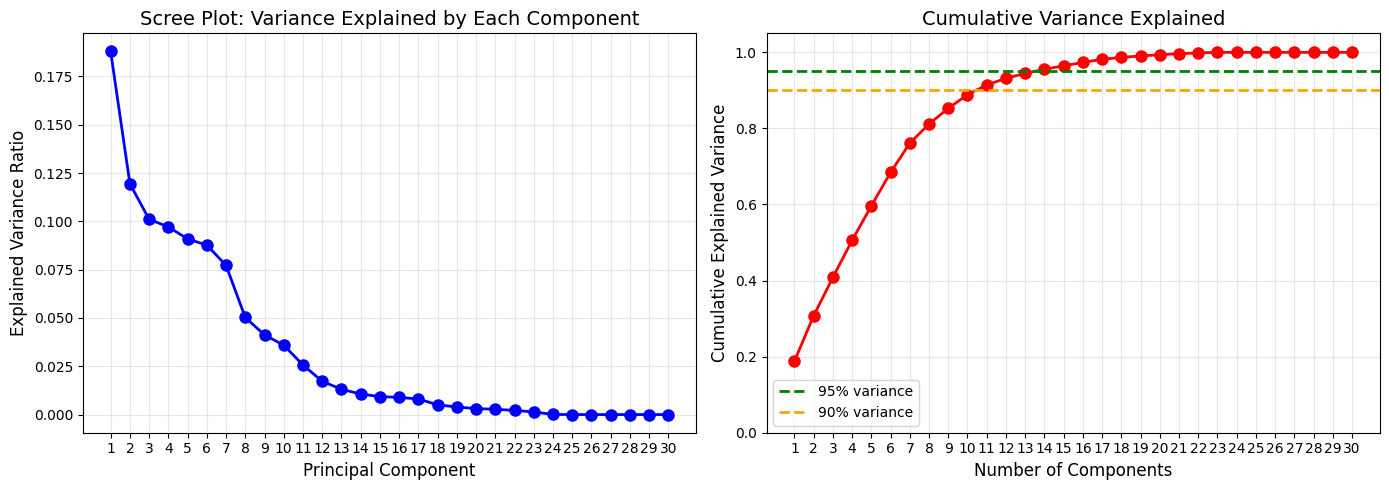

Component 1: 0.1879 variance (0.1879 cumulative)
Component 2: 0.1195 variance (0.3074 cumulative)
Component 3: 0.1011 variance (0.4084 cumulative)
Component 4: 0.0971 variance (0.5056 cumulative)
Component 5: 0.0909 variance (0.5965 cumulative)
Component 6: 0.0877 variance (0.6842 cumulative)
Component 7: 0.0772 variance (0.7614 cumulative)
Component 8: 0.0502 variance (0.8116 cumulative)
Component 9: 0.0412 variance (0.8529 cumulative)
Component 10: 0.0359 variance (0.8888 cumulative)
Component 11: 0.0257 variance (0.9144 cumulative)
Component 12: 0.0172 variance (0.9316 cumulative)
Component 13: 0.0131 variance (0.9447 cumulative)
Component 14: 0.0106 variance (0.9554 cumulative)
Component 15: 0.0093 variance (0.9647 cumulative)
Component 16: 0.0089 variance (0.9736 cumulative)
Component 17: 0.0081 variance (0.9816 cumulative)
Component 18: 0.0051 variance (0.9867 cumulative)
Component 19: 0.0039 variance (0.9906 cumulative)
Component 20: 0.0031 variance (0.9937 cumulative)
Component

In [13]:
plot_elbow(X)

Take the first 8 principal components for best balance between shrinkage and variance capture.

In [20]:
k = 8

X_projections, principal_components, explained_variance, mean = pca(X, k)

pca_columns = [f'PC{i+1}' for i in range(k)]
df_pca = pd.DataFrame(X_projections, columns=pca_columns)
df_pca["Transported"] = y

print(df_pca.shape)
df_pca.head()

# Export to CSV
output_filename = f"pca_transformed_{k}components.csv"
df_pca.to_csv(output_filename, index=False)
print(f"\n✓ Exported to: {output_filename}")

# Download the file
files.download(output_filename)
print("✓ Download started!")


(8693, 9)

✓ Exported to: pca_transformed_8components.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Download started!
